******

# Checklist:
## Titles for your final report

### Introduction:
- provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
- clearly state the question you tried to answer with your project
- identify and describe the dataset that was used to answer the question

### Methods & Results:
- describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.
- your report should include code which:
- - loads data from the original source on the web
  - wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned analysis
  - performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis
  -  creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
  -  performs the data analysis
  -  creates a visualization of the analysis 
- note: all tables and figure should have a figure/table number and a legend

### Discussion:
- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?

### References
- At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references).
Make sure to cite the source of your data as well.
- hint - you can use your proposal as a basis for your final report

# Linear Regression Model Predicting Breakfast Cereal Popularity

## Introduction

background info + significance

state question: e.g. “How can we predict the level of quality of the White Vinho Verde given the physicochemical attributes in our dataset?”

Introduce dataset

Describe variables in dataset

Summary/ goals of report ?

<b> Background and Significance </b>

Cereal for breakfast has become a mainstay in homes all across the world. These cereals come in a variety of tastes, sizes, and nutritional compositions that can be eaten as a crunchy snack, with milk, or yogurt. As buyers, we frequently select cereals based on factors like flavor, nutritional value, and brand reputation. But what actual elements influence the appeal of a cereal? This study attempts to solve the puzzle by examining the connection between cereal evaluations and nutrient characteristics. 


<b> Research Issue </b>
In our project, we will try to answer the question: "Given their physicochemical properties, how can we predict the level of popularity of breakfast cereals?" We'll examine a dataset with details on different cereals and the qualities that go along with them to find the answer to this. We can give marketers and producers useful information by identifying the characteristics that affect cereal ratings.


<b> The Dataset </b>
We have nutrition data for a wide variety of cereals in our dataset. The following are some essential qualities we'll be utilizing:

<b> Calories: </b> The amount of energy in one serving.

<b> Protein: </b> necessary for development and maintenance.

<b> Fat: </b> A factor in flavor and fullness.

<b> Sodium: </b> Has an impact on preservation and flavor.

<b> Fiber: </b> Supports healthy digestion.

<b> Sugars: </b> Affects sweetness and allure in general.

<b> Summary and Goals </b>
Our report aims to accomplish the following:

<b> Exploratory Data Analysis (EDA)</b>: We will look for any outliers, show the distribution of cereal properties, and investigate correlations.

<b> Feature Selection: </b> We will choose pertinent attributes for our linear regression model based on EDA.

<b> Model Building: </b> To forecast cereal popularity, we will build a linear regression model. 

<b> Interpretation: </b> We'll evaluate the model's performance and interpret the coefficients. 


Lastly, we'll provide concrete suggestions for cereal producers and marketers to improve the allure of their goods.

## Methods & Results

In [1]:
#Run this cell before proceeding
set.seed(1234)
library(repr)
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(gridExtra)
library(cowplot)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

Downloading the CSV file and extracting the data,

In [2]:
url <- "https://raw.githubusercontent.com/jaysjello/dsci-100-project_group24/main/data/cereal.csv"
download.file(url, "data/cereal.csv")

In [3]:
cereal_raw <- read_csv("data/cereal.csv")
head(cereal_raw)

Rows: 77 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): name, mfr, type
dbl (13): calories, protein, fat, sodium, fiber, carbo, sugars, potass, vita...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1,0.33,68.40297
100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1,1.00,33.98368
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1,0.33,59.42551
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1,0.50,93.70491
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1,0.75,34.38484
Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1,0.75,29.50954


The dataset contains nutrition information from columns `calories` to `vitamins`. For the purpose of this analysis, only those columns along with name and rating will be needed.

Cleaning the data,

In [4]:
cereal_clean <- cereal_raw |>
    select(name, calories:vitamins, rating) |>
    arrange(rating)
head(cereal_clean)

name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cap'n'Crunch,120,1,2,220,0,12,12,35,25,18.04285
Cinnamon Toast Crunch,120,1,3,210,0,13,9,45,25,19.82357
Honey Graham Ohs,120,1,2,220,1,12,11,45,25,21.87129
Count Chocula,110,1,1,180,0,12,13,65,25,22.39651
Cocoa Puffs,110,1,1,180,0,12,13,55,25,22.73645
Golden Grahams,110,1,1,280,0,15,9,45,25,23.80404


Now, we will split the data into the training and testings sets. Since the original sample size is small (77 rows), we will split the data into 75% training and 25% testing.

In [5]:
# Setting the seed (do NOT remove)
set.seed(1234)

cereal_split <- initial_split(cereal_clean, prop = 0.75, strata = rating)

# Training
cereal_training <- training(cereal_split)
#Testing
cereal_testing <- testing(cereal_split)

head(cereal_training)
head(cereal_testing)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 3 breaks instead.”


name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cinnamon Toast Crunch,120,1,3,210,0,13,9,45,25,19.82357
Count Chocula,110,1,1,180,0,12,13,65,25,22.39651
Cocoa Puffs,110,1,1,180,0,12,13,55,25,22.73645
Golden Grahams,110,1,1,280,0,15,9,45,25,23.80404
Lucky Charms,110,2,1,180,0,12,12,55,25,26.73451
Trix,110,1,1,140,0,13,12,25,25,27.75330


name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cap'n'Crunch,120,1,2,220,0,12,12,35,25,18.04285
Honey Graham Ohs,120,1,2,220,1,12,11,45,25,21.87129
Nut&Honey Crunch,120,2,1,190,0,15,9,40,25,29.92429
Frosted Flakes,110,1,0,200,1,14,11,25,25,31.43597
Apple Jacks,110,2,0,125,1,11,14,30,25,33.17409
Almond Delight,110,2,2,200,1,14,8,-1,25,34.38484


Now plotting the variables with rating to visually identify which variables affect rating using the training data,

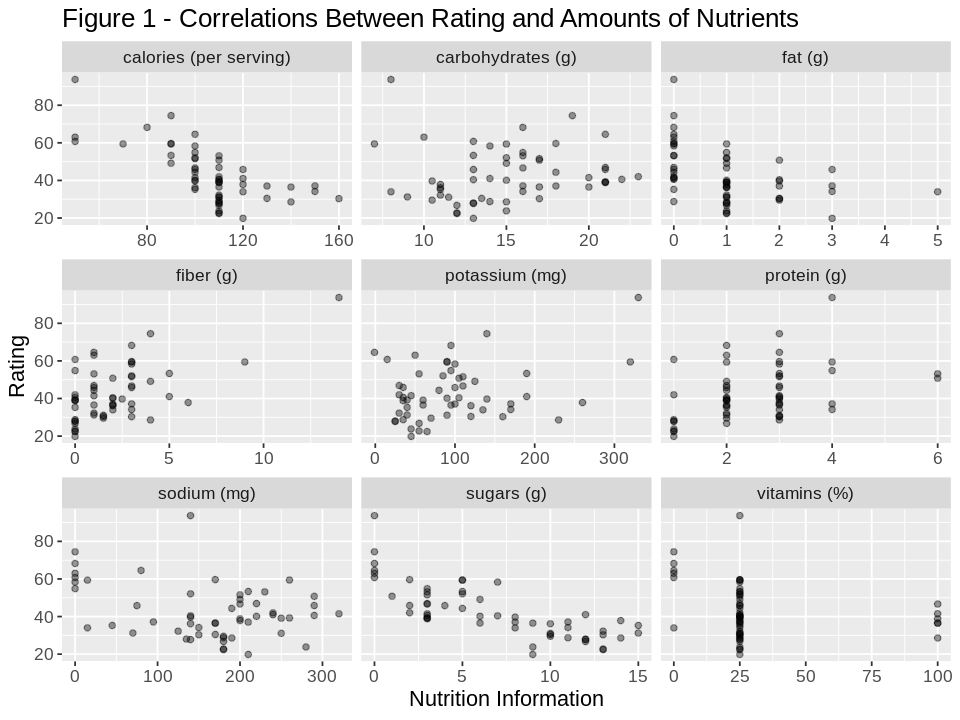

In [6]:
options(repr.plot.width=8,repr.plot.height=6)

cereal_plot_data <- cereal_training |>
    mutate("calories (per serving)" = calories,
           "protein (g)" = protein,
           "fat (g)" = fat,
           "sodium (mg)" = sodium,
           "fiber (g)" = fiber,
           "carbohydrates (g)" = carbo,
           "sugars (g)" = sugars,
           "potassium (mg)" = potass,
           "vitamins (%)" = vitamins) |>
    select(-calories, -protein, -fat, -sodium, -fiber, -carbo, -sugars, -potass, -vitamins) |>
    pivot_longer(cols = -c("name", "rating"), names_to = "nutrient_type", values_to = "values")

cereal_plot <- cereal_plot_data |>
    ggplot(aes(x = values, y = rating)) +
    geom_point(alpha = 0.4) +
    labs(x = "Nutrition Information", y = "Rating") +
    ggtitle("Figure 1 - Correlations Between Rating and Amounts of Nutrients") +
    theme(text = element_text(size = 13)) +
    facet_wrap(~nutrient_type, scales = "free_x")

cereal_plot

From Figure 1, we can see that there is a strong correlation between rating and the x-axis for:

- `calories`,
- `fat`, and
- `sugars`,

and a slight correlation between rating and the x-axis for:
- `protein`, and
- `fiber`.

We will use these five as predictors in the regression model, and due to the clear linear relationship between the predictors and rating, we will use a linear regression model rather than a _k-nn_ regression model.

Continuing the exploratory analysis, we will find the average values and range of values for the training data.

In [7]:
# Summarizing the mean and range of predictors
cereal_selected_mean_summary <- cereal_training |>
    summarize(mean_rating  = mean(rating),
              mean_cal     = mean(calories),
              mean_protein = mean(protein),
              mean_fat     = mean(fat),
              mean_fiber   = mean(fiber),
              mean_sugars  = mean(sugars))
cereal_selected_low_summary <- cereal_training |>
    summarize(low_rating  = min(rating),
              low_cal     = min(calories),
              low_protein = min(protein),
              low_fat     = min(fat),
              low_fiber   = min(fiber),
              low_sugars  = min(sugars))
cereal_selected_high_summary <- cereal_training |>
    summarize(high_rating  = max(rating),
              high_cal     = max(calories),
              high_protein = max(protein),
              high_fat     = max(fat),
              high_fiber   = max(fiber),
              high_sugars  = max(sugars))

cereal_selected_mean_summary
print("Table 1 - Summary - Mean Values")
cereal_selected_low_summary
print("Table 2 - Summary - Lower End of Range of Values")
cereal_selected_high_summary
print("Table 3 - Summary - Upper End of Range of Values")

mean_rating,mean_cal,mean_protein,mean_fat,mean_fiber,mean_sugars
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
42.79158,106.4286,2.535714,0.9821429,2.053571,6.785714


[1] "Table 1 - Summary - Mean Values"


low_rating,low_cal,low_protein,low_fat,low_fiber,low_sugars
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19.82357,50,1,0,0,0


[1] "Table 2 - Summary - Lower End of Range of Values"


high_rating,high_cal,high_protein,high_fat,high_fiber,high_sugars
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
93.70491,160,6,5,14,15


[1] "Table 3 - Summary - Upper End of Range of Values"


From the above tables, the values for calories are much greater compared to the other predictors. To avoid favouring one predictor in the model, scaling will be used in the recipe.

Additionally, for `rating`, `calories`, `protein` and `sugars`, the mean is roughly halfway within the range, and are likely well-distributed within the dataset. Values for `fat` and `fiber` lean towards the lower end of the range, indicating the presence of outliers. However, for a more simple analysis, we will ignore the prospect of outliers.

Building the specification and recipe for the model and putting them together in a workflow,

In [8]:
# Specification
lm_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

# Recipe
cereal_recipe <- recipe(rating ~ calories + protein + fat + fiber + sugars, data = cereal_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Workflow + Fitting to training data set
cereal_fit <- workflow() |>
    add_recipe(cereal_recipe) |>
    add_model(lm_spec) |>
    fit(data = cereal_training)

cereal_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)     calories      protein          fat        fiber       sugars  
     42.792       -3.379        2.678       -2.562        5.142       -6.924  


We will now test to see how well the model predicts ratings of breakfast cereals by calculating the RMSE using the training data and the RMSPE using the testing data.

In [9]:
# Root Mean Squared Error (RMSE)
lm_rmse <- cereal_fit |>
    predict(cereal_training) |>
    bind_cols(cereal_training) |>
    metrics(truth = rating, estimate = .pred) |>
    filter(.metric == "rmse") |>
    select(.estimate) |>
    pull()

# Root Mean Squared Prediction Error (RMSPE)
lm_rmspe <- cereal_fit |>
    predict(cereal_testing) |>
    bind_cols(cereal_testing) |>
    metrics(truth = rating, estimate = .pred) |>
    filter(.metric == "rmse") |>
    select(.estimate) |>
    pull()

# Combining the two into one tibble,
lm_rmse_and_rmspe <- tibble(RMSE = lm_rmse, RMSPE = lm_rmspe)

lm_rmse_and_rmspe
print("Table 4 - Linear Regression RMSE and RMSPE")

RMSE,RMSPE
<dbl>,<dbl>
4.696962,4.317212


[1] "Table 4 - Linear Regression RMSE and RMSPE"


From the values in Table 4, predicted ratings will be accurate to roughly __± 4.5__.

Although it is assumed that a linear regression model will be more accurate than a _k-nn_ regression model, we will perform analysis with a k-nn model to check this assumption,

In [10]:
# Setting the seed (do NOT remove)
set.seed(2345)

# Building the k-nn specification to use for tuning the model,
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

# k-nn recipe
knn_recipe <- recipe(rating ~ calories + protein + fat + fiber + sugars, data = cereal_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Combining the specification and recipe into a workflow to find the best k value,
knn_workflow <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec)

# Performing 5-fold cross-validation,
knn_vfold <- vfold_cv(cereal_training, v = 5, strata = rating)

# Finding the best k-value from K = 1 to K = 38
## Letting the range of k values extend to half of the number of observations.
## Note: Originally, there were 77 observations, but one was excluded for having a negative sugar value.
gridvals <- tibble(neighbors = seq(from = 1, to = 38, by = 1))
best_k <- knn_workflow |>
    tune_grid(resamples = knn_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "rmse") |>
    slice_min(mean, n = 1) |>
    pull(neighbors)

# Building a new specification and workflow with the best k value,
knn_better_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
    set_engine("kknn") |>
    set_mode("regression")
knn_fit <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_better_spec) |>
    fit(data = cereal_training)

# Finding the RMSPE using the k-nn regression model,
knn_rmspe <- knn_fit |>
    predict(cereal_testing) |>
    bind_cols(cereal_testing) |>
    metrics(truth = rating, estimate = .pred) |>
    filter(.metric == "rmse") |>
    select(.estimate) |>
    pull()

# Combining the RMSPE from k-nn regression and the RMSE and RMSPE from linear regression:
rmse_rmspe_vals <- tibble(lm_RMSPE = lm_rmspe, knn_RMSPE = knn_rmspe)

rmse_rmspe_vals
print("Table 5 - Comparison Between Linear and k-nn Regression RMSPE")

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 2 breaks instead.”


lm_RMSPE,knn_RMSPE
<dbl>,<dbl>
4.317212,5.152904


[1] "Table 5 - Comparison Between Linear and k-nn Regression RMSPE"


From the above table, the RMSPE from the linear regression model is roughly 1 less than that of the model using nearest neighbors. It can be concluded that the linear regression model provides slightly more accurate predictions than the k-nn regression model and we will be using the prior to perform predictions.

After creating our model, we will now perform predictive analysis on the 5 new cereals. 

All information was found on either the cereal brand's offical site or walmart.com. Below, we tabulate the nutrition information in a tibble.

In [11]:
new_cereals <- tibble(name = c("Trix Marshmallows Cereal",
                              "Maple Cinnamon Cheerios Hearty Nut Medley",
                              "Honey Nut Cheerios Minis",
                              "Lucky Charms Berry Swirl",
                              "Reese's Puffs Peanut Butter Lovers"),
                      calories = c(150, 210, 140, 140, 160),
                      protein = c(2, 6, 3, 2, 3),
                      fat = c(1.5, 6, 2, 1.5, 4.5),
                      fiber = c(2, 6, 3, 2, 2),
                      sugars = c(12, 9, 12, 12, 12))

new_cereals
print("Table 6 - Five New Cereals Nutrition Label Information")

name,calories,protein,fat,fiber,sugars
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Trix Marshmallows Cereal,150,2,1.5,2,12
Maple Cinnamon Cheerios Hearty Nut Medley,210,6,6.0,6,9
Honey Nut Cheerios Minis,140,3,2.0,3,12
Lucky Charms Berry Swirl,140,2,1.5,2,12
Reese's Puffs Peanut Butter Lovers,160,3,4.5,2,12


[1] "Table 6 - Five New Cereals Nutrition Label Information"


Using the linear regression model to predict the ratings of these new cereals,

In [12]:
new_cereals_preds <- cereal_fit |>
    predict(new_cereals) |>
    bind_cols(new_cereals) |>
    select(name, .pred)

new_cereals_preds
print("Table 7 - Five New Cereals Predicted Ratings")

name,.pred
<chr>,<dbl>
Trix Marshmallows Cereal,25.28806
Maple Cinnamon Cheerios Hearty Nut Medley,27.35235
Honey Nut Cheerios Minis,30.20799
Lucky Charms Berry Swirl,26.88281
Reese's Puffs Peanut Butter Lovers,18.71839


[1] "Table 7 - Five New Cereals Predicted Ratings"


To visualize the data from the new cereals, we will compare their values with the mean values of the training population.

First, revisiting the values from Table 1,

In [13]:
cereal_selected_mean_summary
print("Table 1 - Summary - Mean Values")

mean_rating,mean_cal,mean_protein,mean_fat,mean_fiber,mean_sugars
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
42.79158,106.4286,2.535714,0.9821429,2.053571,6.785714


[1] "Table 1 - Summary - Mean Values"


To visualize the results of the data, we will find the proportional difference from the mean values for the predictors and plot those percentages against the values for rating.

In [14]:
# Pulling the values from the mean values tibble,
avg_rating <- cereal_selected_mean_summary |>
    select(mean_rating) |>
    pull()
avg_calories <- cereal_selected_mean_summary |>
    select(mean_cal) |>
    pull()
avg_protein <- cereal_selected_mean_summary |>
    select(mean_protein) |>
    pull()
avg_fat <- cereal_selected_mean_summary |>
    select(mean_fat) |>
    pull()
avg_fiber <- cereal_selected_mean_summary |>
    select(mean_fiber) |>
    pull()
avg_sugars <- cereal_selected_mean_summary |>
    select(mean_sugars) |>
    pull()

cereal_preds <- cereal_fit |>
    predict(new_cereals) |>
    bind_cols(new_cereals) |>
    mutate(rating = .pred) |>
    select(- .pred) |>
    mutate(calories = (100 * calories / avg_calories),
           protein  = (100 * protein  / avg_protein ),
           fat      = (100 * fat      / avg_fat     ),
           fiber    = (100 * fiber    / avg_fiber   ),
           sugars   = (100 * sugars   / avg_sugars  ))

cereal_preds
print("Table 8 - Five New Cereals Nutrition Info + Predicted Ratings")

name,calories,protein,fat,fiber,sugars,rating
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Trix Marshmallows Cereal,140.9396,78.87324,152.7273,97.3913,176.8421,25.28806
Maple Cinnamon Cheerios Hearty Nut Medley,197.3154,236.61972,610.9091,292.1739,132.6316,27.35235
Honey Nut Cheerios Minis,131.5436,118.30986,203.6364,146.0870,176.8421,30.20799
Lucky Charms Berry Swirl,131.5436,78.87324,152.7273,97.3913,176.8421,26.88281
Reese's Puffs Peanut Butter Lovers,150.3356,118.30986,458.1818,97.3913,176.8421,18.71839


[1] "Table 8 - Five New Cereals Nutrition Info + Predicted Ratings"


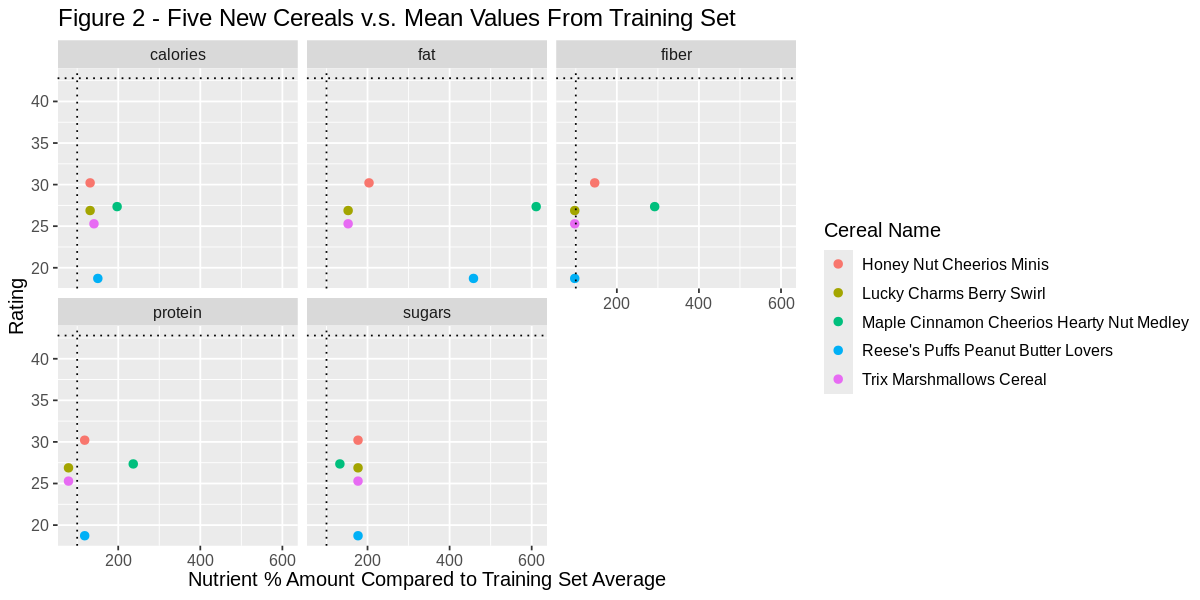

In [15]:
options(repr.plot.width=10,repr.plot.height=5)

cereal_preds_plot_data <- cereal_preds |>
    pivot_longer(cols = -c("name", "rating"), names_to = "nutrient_type", values_to = "values")

cereal_preds_plot <- cereal_preds_plot_data |>
    ggplot(aes(x = values, y = rating, colour = name)) +
    geom_point(size = 2) +
    geom_vline(xintercept = 100, linetype = "dotted") +
    geom_hline(yintercept = avg_rating, linetype = "dotted") +
    labs(x = "Nutrient % Amount Compared to Training Set Average", y = "Rating", colour = "Cereal Name") +
    ggtitle("Figure 2 - Five New Cereals v.s. Mean Values From Training Set") +
    facet_wrap(~nutrient_type) +
    theme(text = element_text(size = 12))

cereal_preds_plot

In the above figure, the vertical line represents the average value from the training data for each of the nutrients. The horizontal line represents the average rating from the training data.

## Discussion

## References

predictions for wanted cereal samples

- Trix with marshmallows, https://www.walmart.com/ip/General-Mills-Trix-Trax-Fruit-Flavored-Corn-Puffs-Cereal-15-3-oz-Family-Size/526441675?from=/searchdetails.970024308.html#:~:text=Naturally%20and%20artificially%20fruit%20flavored,)%3B%2012%20g%20total%20sugars.

- Maple Cinnamon Cheerios Hearty Nut Medley, https://www.cheerios.com/products/hearty-nut-medley-cheerios

- Honey Nut Cheerios Minis, https://www.cheerios.com/products/honey-nut-cheerios-minis

- Lucky Charms Berry Swirl, https://www.luckycharms.com/products/lucky-charms-berry-swirl-breakfast-cereal-with-marshmallows-kids-breakfast-cereal-made-with-whole-grain

- Reese’s Puffs Peanut Butter Lover https://www.walmart.com/ip/REESE-s-PUFFS-Peanut-Butter-Lovers-Cereal-Made-with-Whole-Grain-Family-Size-19-7-oz/1185231609


Crawford, C. (2018). *80 Cereals* [Data set]. Kaggle. https://www.kaggle.com/datasets/crawford/80-cereals?
    resource=download.
    
*Six New General Mills Cereals for 2024*. (2023, December 11). Prepared Foods.
    https://www.preparedfoods.com/articles/128754-six-new-general-mills-cereals-for-2024.